In [1]:
import sys
sys.path.append('..')

In [2]:
import planetengine
import modelscripts

In [6]:
initial = {
    'temperatureField': planetengine.initials.sinusoidal.IC(),
    'materialVar': planetengine.initials.extents.IC(([1], planetengine.shapes.trapezoid())),
    }

In [7]:
system = modelscripts.MS98X_systemscript.build(res = 64, f = 0.5, tau = 1e5)

In [8]:
planetengine.initials.apply(initial, system)

In [9]:
system.solve()

Fitted 1 variables to the figure.



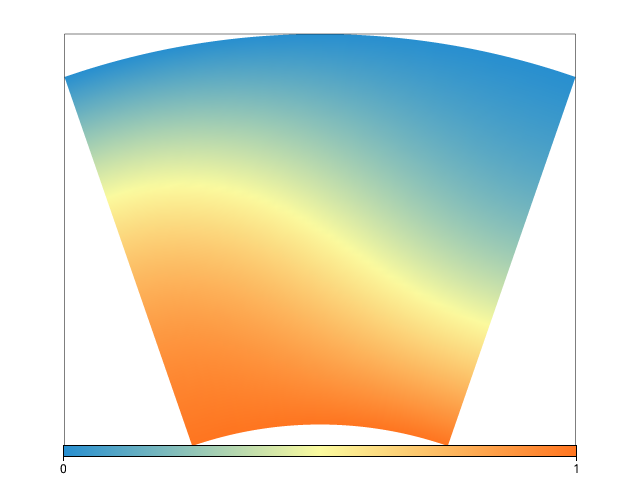

In [11]:
planetengine.quickShow(system.temperatureField)

In [12]:
# Example of how to build a 'scalar integral'
myint = planetengine.newstats.StandardIntegral(
    system.viscosityFn * system.velocityField,
    comp = 'mag',
    gradient = 'rad',
    surface = 'outer'
    )

Building integral...
Integral built.


In [13]:
obsVars = {
    'temperature': system.temperatureField,
    'velocity': system.velocityField,
    'viscosity': system.viscosityFn,
    'stress': system.viscosityFn * system.velocityField
    }

In [18]:
from underworld import function as fn

In [20]:
myconst = fn.misc.constant(1)

In [22]:
type(myconst) is fn.misc.constant

True

In [27]:
type(myconst.value)

int

In [14]:
statsDict = {}
formatDict = {}
statsmodule = planetengine.newstats

for varName, var in sorted(obsVars.items()):

    if type(var) is fn.misc.constant

        anVar = statsmodule.ArrayStripper(
            var,
            (0, 0),
            )
        statsDict[varName] = anVar

        if type(myconst.value) is int:
            formatDict[varName] = "{:.0f}"
        else:
            formatDict[varName] = "{:.1E}"

    else:

        pevar = planetengine.standardise(var)
        var = pevar.var

        standardIntegralSuite = {
            'surface': ['volume', 'inner', 'outer'],
            'comp': ['mag', 'ang', 'rad'],
            'gradient': [None, 'ang', 'rad']
            }

        for inputDict in planetengine.utilities.suite_list(standardIntegralSuite):

            anVar = statsmodule.StandardIntegral(
                var,
                **inputDict
                )
            statsDict[varName + '_' + anVar.opTag] = anVar

            formatDict[varName] = "{:.2f}"

Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
Building integral...
Integral built.
B

In [17]:
statsDict

{'stress_angComp_angGrad_innerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b83d5f98>,
 'stress_angComp_angGrad_outerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b835e160>,
 'stress_angComp_angGrad_volumeInt': <planetengine.newstats.StandardIntegral at 0x7fd3b83d0518>,
 'stress_angComp_innerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b83c7ac8>,
 'stress_angComp_outerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b83cb2b0>,
 'stress_angComp_radGrad_innerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b836fdd8>,
 'stress_angComp_radGrad_outerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b8377748>,
 'stress_angComp_radGrad_volumeInt': <planetengine.newstats.StandardIntegral at 0x7fd3b8361dd8>,
 'stress_angComp_volumeInt': <planetengine.newstats.StandardIntegral at 0x7fd3b83bf780>,
 'stress_angGrad_innerInt': <planetengine.newstats.StandardIntegral at 0x7fd3b83993c8>,
 'stress_angGrad_outerInt': <planetengine.newstats.StandardIntegral a

In [ ]:
resultsDict = {key: integral() for key, integral in sorted(statsDict.items())}

In [ ]:
resultsDict

In [ ]:
- resultsDict['temperature_radGrad_outerInt'] / resultsDict['temperature_innerInt']

In [ ]:
for i in range(1000):
    system.iterate()

In [ ]:
planetengine.quickShow(system.temperatureField, system.velocityField, system.materialVar)

In [ ]:
resultsDict = {key: integral() for key, integral in sorted(statsDict.items())}

In [ ]:
- resultsDict['temperature_radGrad_outerInt'] / resultsDict['temperature_innerInt']

In [ ]:
from underworld import function as fn

In [ ]:
planetengine.quickShow(fn.math.dot(system.mesh.unitvec_theta_Fn, system.viscosityFn * system.velocityField))